In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import os

# Make sure to re-name BOTH of these so the correct file is read in, 
# and so the cleaned file doesn't over-write previous work
file_name = "dm_export_20000101_20230205 (1).csv"
new_file_name = "0002_cleaned_US_Drought_Monitor.csv"

csv_df = pd.read_csv(f"Resources/{file_name}")

# Display sample data
csv_df.head()

,StateAbbreviation,AreaCurrentPercent,AreaCurrent,PopulationCurrent,PopulationCurrentPercent,PercentChangeFromWAve,AreaChangeFromWAve,StatisticFormatID,USDMLevelID,USDMLevel,Name,AreaMiles,MapDate
0,CA,48.17,"76,187.59","28,130,516.06",75.51,0.0,0.0,2,1,D0,California,"158,147.87",2000-01-04
1,CA,81.75,"129,289.05","31,598,388.02",84.82,0.0,0.0,2,1,D0,California,"158,147.87",2000-01-11
2,CA,72.04,"113,921.84","28,689,915.36",77.01,0.0,0.0,2,1,D0,California,"158,147.87",2000-01-18
3,CA,55.97,"88,511.14","24,683,436.34",66.26,0.0,0.0,2,1,D0,California,"158,147.87",2000-01-25
4,CA,50.88,"80,468.74","24,031,764.14",64.51,0.0,0.0,2,1,D0,California,"158,147.87",2000-02-01


In [3]:
d = {'Map Date': csv_df['MapDate'],
     'Drought Level': csv_df['USDMLevel'],
     'Drought Level Number': csv_df['USDMLevelID'],
     'Population Current': csv_df['PopulationCurrent'],
     'Population Current %': csv_df['PopulationCurrentPercent'],
     'Area Current': csv_df['AreaCurrent'],
     'Area Current %': csv_df['AreaCurrentPercent'],
     'Area Miles': csv_df['AreaMiles'],
     }
cleaned_df = pd.DataFrame(data = d, index = None)
cleaned_df

,Map Date,Drought Level,Drought Level Number,Population Current,Population Current %,Area Current,Area Current %,Area Miles
0,2000-01-04,D0,1,"28,130,516.06",75.51,"76,187.59",48.17,"158,147.87"
1,2000-01-11,D0,1,"31,598,388.02",84.82,"129,289.05",81.75,"158,147.87"
2,2000-01-18,D0,1,"28,689,915.36",77.01,"113,921.84",72.04,"158,147.87"
3,2000-01-25,D0,1,"24,683,436.34",66.26,"88,511.14",55.97,"158,147.87"
4,2000-02-01,D0,1,"24,031,764.14",64.51,"80,468.74",50.88,"158,147.87"
...,...,...,...,...,...,...,...,...
3765,2023-01-24,D1,2,"28,521,258.43",76.56,"90,130.59",56.99,"158,147.87"
3766,2023-01-24,D2,3,"5,615,370.55",15.07,"51,509.75",32.57,"158,147.87"
3767,2023-01-31,D0,1,"3,090,885.86",8.30,"15,494.80",9.80,"158,147.87"
3768,2023-01-31,D1,2,"28,521,258.43",76.56,"90,130.59",56.99,"158,147.87"


In [4]:
types = cleaned_df.dtypes
print(types)

Map Date                 object
Drought Level            object
Drought Level Number      int64
Population Current       object
Population Current %    float64
Area Current             object
Area Current %          float64
Area Miles               object
dtype: object


In [5]:
#Note: D0 = 1, D1 = 2, D3 = 4, D4 = 5

cleaned_df["Drought Level Number"].describe()

count    3770.000000
mean        2.423607
std         1.224420
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Drought Level Number, dtype: float64

In [6]:
#Drought level impact on population and area over time stat
summary_mean = cleaned_df.groupby("Drought Level").mean()
summary_median = cleaned_df.groupby("Drought Level").median()
summary_var = cleaned_df.groupby("Drought Level").var()
summary_std = cleaned_df.groupby("Drought Level").std()

summary_mean

,Drought Level Number,Population Current %,Area Current %
Drought Level,,,
D0,1,16.112895,16.422338
D1,2,18.985744,19.133819
D2,3,21.322289,22.417238
D3,4,20.842692,22.019720
D4,5,34.885510,29.693306


Text(0.5, 1.0, 'Number of Cases Per Drought Level From Year 2000 to 2023')

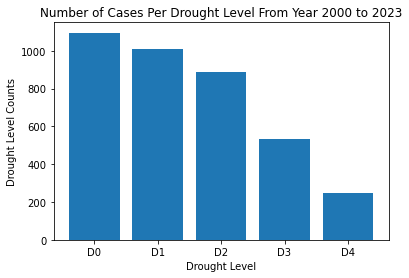

In [7]:
causes = ["D0", "D1", "D2", "D3", "D4"]
counts = cleaned_df["Drought Level"].value_counts()
plt.bar(causes, counts, alpha=1, align = "center")
plt.xlabel("Drought Level")
plt.ylabel("Drought Level Counts")
plt.title("Number of Cases Per Drought Level From Year 2000 to 2023")

In [10]:
cleaned_df['Year'] = pd.DatetimeIndex(cleaned_df['Map Date']).year

In [13]:
cleaned_df.pivot(index = 'Year', columns = "Drought Level", values = "Drought Level Number")

ValueError: Index contains duplicate entries, cannot reshape